**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

In [22]:
## For interactive visualization

import plotly.offline as pf
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

**Reading data**

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
##Check for null values and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [71]:
## Distribution of age, annual income an spending score

In [44]:
df['Age'].iplot(kind='hist', bins=30, xTitle='Age', yTitle='Count', title='Distribution of age', colors='blue')

In [41]:
df['Annual Income (k$)'].iplot(kind='hist', bins=30, xTitle='Annual income', yTitle='Count', title='Distribution of Annual income', colors='red')

In [75]:
df['Spending Score (1-100)'].iplot(kind='hist', bins =30, xTitle = 'Spending Score', yTitle = 'Count', title='Distribution of spending score')

**Most people earn around 40-80 USD**

**Regular customers has age around 30-40 years. People in age group 30-35 are most frequent visitors. Younger crowd is more frequent visitors in comparision**

**Most of the customers have spending score in range 40-60**

(-1.25, 1.25, -1.25, 1.25)

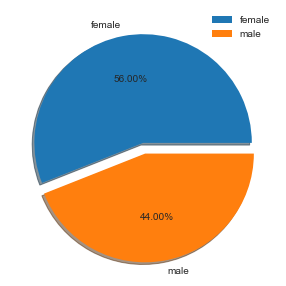

In [69]:
plt.pie(df['Gender'].value_counts(), explode=[0,.1], labels=['female', 'male'], shadow=True, autopct='%.2f%%')
plt.legend()
plt.axis('off')

**From above graph its clear that females are in lead**

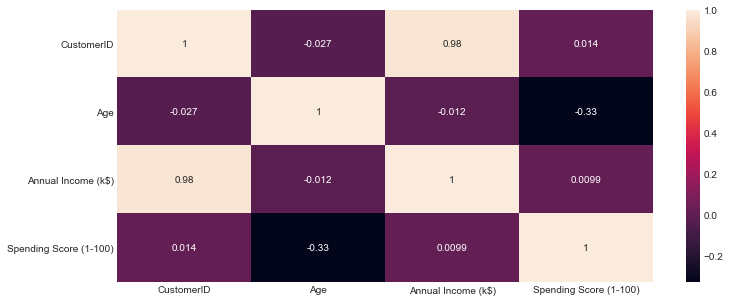

In [98]:
sns.heatmap(df.corr(), annot=True)

**Not much correlation between attributes**

In [99]:
##Checking on how spending score is correlated.
(df.corr()['Spending Score (1-100)']).sort_values(ascending=False)

Spending Score (1-100)    1.000000
CustomerID                0.013835
Annual Income (k$)        0.009903
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

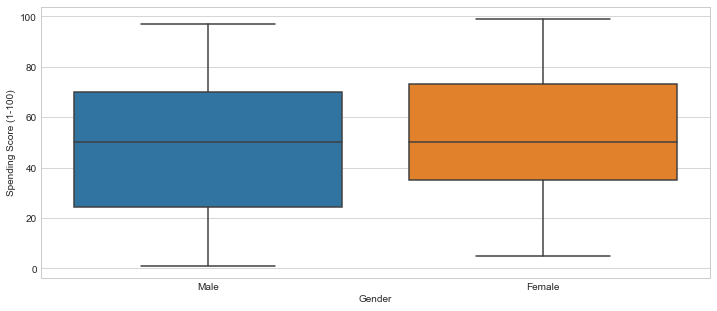

In [104]:
sns.boxplot(df['Gender'], df['Spending Score (1-100)'])

**Male and female has almost same spending score, but females have little bit high spending score around 75**

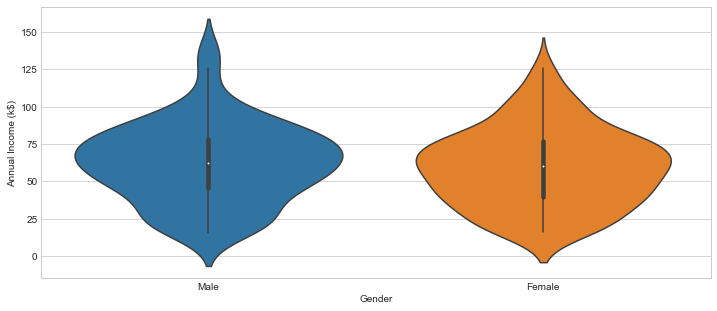

In [107]:
sns.violinplot(df['Gender'], df['Annual Income (k$)'])

**Males and females have same pattern with regard to annual income**

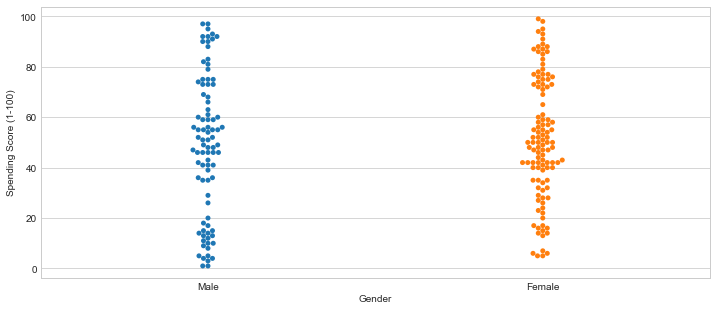

In [108]:
sns.swarmplot(df['Gender'], df['Spending Score (1-100)'])

**Most of spending score is between 40 and 60, density is more for females in this range**

In [109]:
from sklearn.cluster import KMeans

In [110]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [118]:
X = df.iloc[:, [3,4]]

In [119]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [120]:
kmeans.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [121]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [48.26      , 56.48      ]])

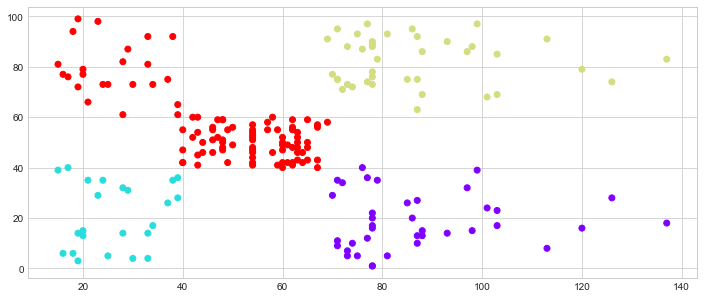

In [134]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')

**Now we will cluster customers based on their annual income and spending score using kmeans**

In [135]:
from sklearn.metrics import silhouette_score

In [136]:
silhouette_score(X, kmeans.labels_)

0.4931963109249047

In [137]:
from yellowbrick.cluster import KElbowVisualizer

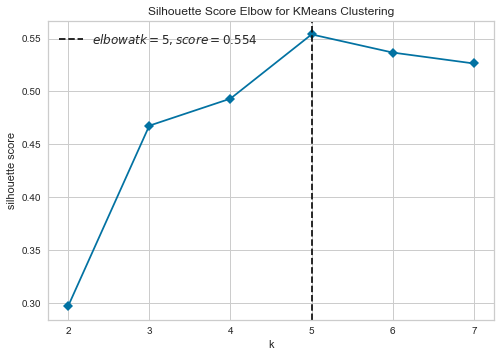

In [138]:
visualizer = KElbowVisualizer(kmeans, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.poof()

In [139]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

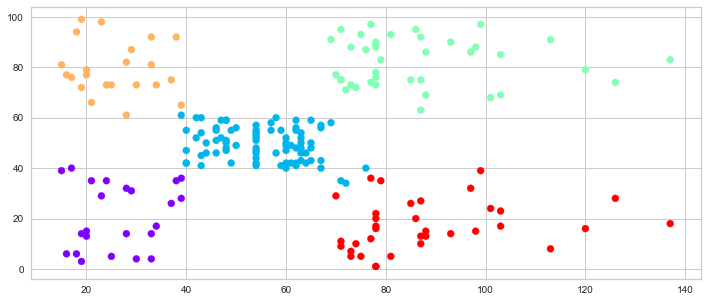

In [140]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')

In [141]:
y_pred = kmeans.fit_predict(X)

In [142]:
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0, 0.5, 'Spending Score (1-100)')

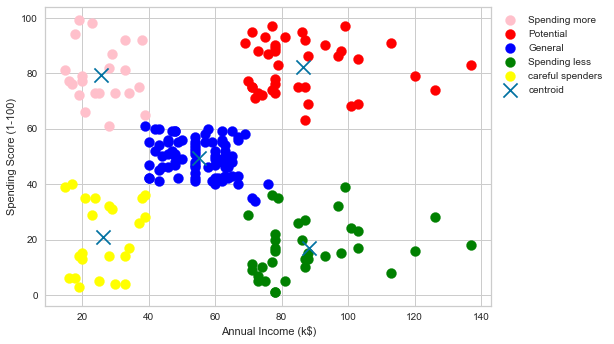

In [180]:
plt.scatter(X.iloc[y_pred==0, 0], X.iloc[y_pred==0, 1], s = 100, c = 'pink' , label='Spending more')
plt.scatter(X.iloc[y_pred==1, 0], X.iloc[y_pred==1, 1], s = 100, c = 'red' ,label='Potential')
plt.scatter(X.iloc[y_pred==2, 0], X.iloc[y_pred==2, 1], s = 100, c = 'blue', label='General' )
plt.scatter(X.iloc[y_pred==3, 0], X.iloc[y_pred==3, 1], s = 100, c = 'green' , label='Spending less')
plt.scatter(X.iloc[y_pred==4, 0], X.iloc[y_pred==4, 1], s = 100, c = 'yellow', label='careful spenders')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, linewidths=20, label='centroid')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

**Below is the list of customers who earn very less but they spend more**

In [184]:
df[y_pred==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


**Below is the list of customers who earn  more and they spend more, kind of potential customers**

In [185]:
df[y_pred==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


**Below is the list of customers who earn minumum and spend minimum, general customers**

In [186]:
df[y_pred==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


**Below is the list of customers who earn more and spend very less**

In [187]:
df[y_pred==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
146,147,Male,48,77,36
148,149,Female,34,78,22


**Below is the list of customers who earn less and spend less**

In [188]:
df[y_pred==4]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
16,17,Female,35,21,35
18,19,Male,52,23,29


**Now we will cluster customers based on their age and spending score using kmeans**

In [190]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [200]:
X1 = df.iloc[:, [2, 4]]

In [217]:
km = KMeans(n_clusters=5)

In [218]:
km.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [219]:
silhouette_score(X1, km.labels_)

0.4460311217292306

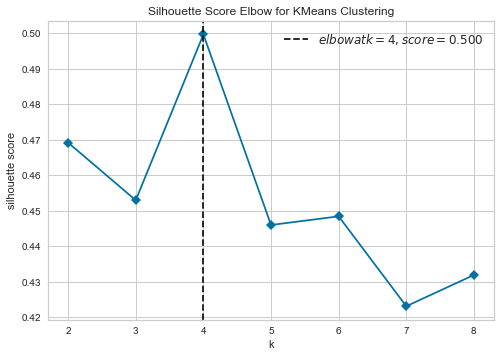

In [206]:
viz = KElbowVisualizer(km, k=(2,9), metric='silhouette', timings=False)
viz.fit(X1)
viz.poof()

In [209]:
km = KMeans(n_clusters=4)
km.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [211]:
y_pred1 = km.fit_predict(X1)

In [212]:
y_pred1

array([3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 3, 1, 0, 3, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

Text(0, 0.5, 'Spending Score (1-100)')

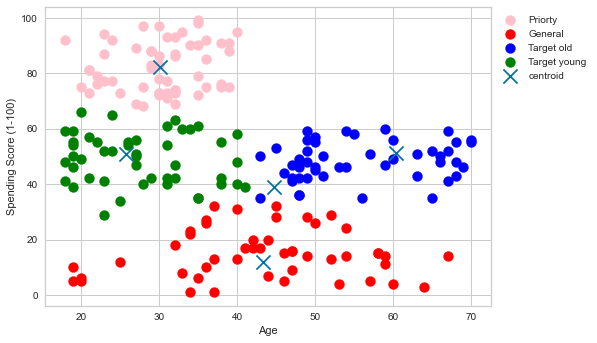

In [223]:
plt.scatter(X1.iloc[y_pred1==0, 0], X1.iloc[y_pred1==0, 1], s = 100, c = 'pink' , label='Priorty')
plt.scatter(X1.iloc[y_pred1==1, 0], X1.iloc[y_pred1==1, 1], s = 100, c = 'red' ,label='General')
plt.scatter(X1.iloc[y_pred1==2, 0], X1.iloc[y_pred1==2, 1], s = 100, c = 'blue', label='Target old' )
plt.scatter(X1.iloc[y_pred1==3, 0], X1.iloc[y_pred1==3, 1], s = 100, c = 'green' , label='Target young')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', s=200, linewidths=20, label='centroid')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

**List of priority customers**

In [220]:
df[y_pred1==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
19,20,Female,35,23,98
21,22,Male,25,24,73


**List of General customers**

In [221]:
df[y_pred1==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
18,19,Male,52,23,29
22,23,Female,46,25,5
24,25,Female,54,28,14
26,27,Female,45,28,32


**List of old customers they can target and increase the spending score**

In [222]:
df[y_pred1==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
42,43,Male,48,39,36
46,47,Female,50,40,55
50,51,Female,49,42,52
53,54,Male,59,43,60
54,55,Female,50,43,45
55,56,Male,47,43,41
56,57,Female,51,44,50
57,58,Male,69,44,46
59,60,Male,53,46,46


**List of young customers they can target and increase the spending score**

In [226]:
df[y_pred1==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
4,5,Female,31,17,40
16,17,Female,35,21,35
17,18,Male,20,21,66
20,21,Male,35,24,35
27,28,Male,35,28,61
43,44,Female,31,39,61
45,46,Female,24,39,65
47,48,Female,27,40,47
48,49,Female,29,40,42
